info:
    https://medium.com/analytics-vidhya/skeletonization-in-python-using-opencv-b7fa16867331
    
    

In [1]:

import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random_image = np.random.random([500, 500])

random_image.shape

(500, 500)

In [3]:
len(random_image)

500

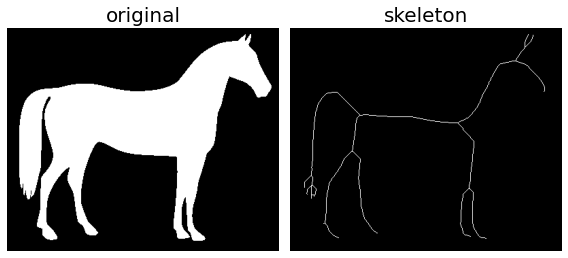

In [4]:

from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

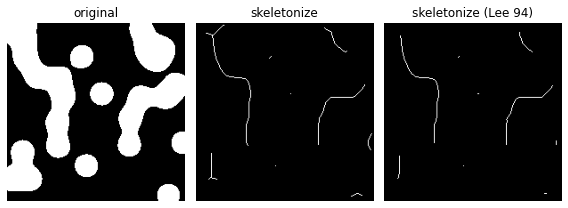

In [5]:
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

blobs = data.binary_blobs(200, blob_size_fraction=.2,
                          volume_fraction=.35, seed=1)

skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

fig, axes = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeletonize')
ax[1].axis('off')

ax[2].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[2].set_title('skeletonize (Lee 94)')
ax[2].axis('off')

fig.tight_layout()
plt.show()

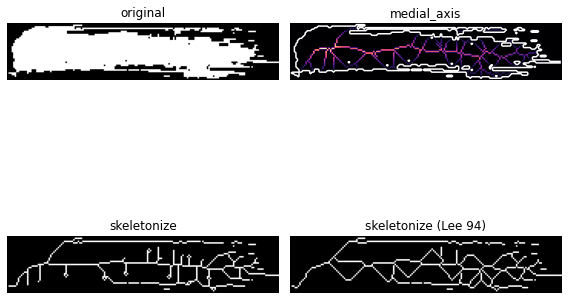

In [21]:
from skimage.morphology import medial_axis, skeletonize
from PIL import Image
import numpy as np

# Generate the data
blobs = data.binary_blobs(200, blob_size_fraction=.2,volume_fraction=.35, seed=1)
dir_path = './data/brush_strokes/00_bs_db/bsu_00026.jpg'

bs_k_im=Image.open(dir_path )
bs_k = np.asarray(bs_k_im)
bs_k=bs_k[:, :, 1] > 250

blobs =bs_k


# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap='magma')
ax[1].contour(blobs, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[3].set_title("skeletonize (Lee 94)")
ax[3].axis('off')

fig.tight_layout()
plt.show()

In [80]:
blobs = data.binary_blobs(200, blob_size_fraction=.2,volume_fraction=.35, seed=1)
type(blobs)
blobs.shape

(200, 200)

In [81]:
blobs

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [82]:
dir_path = './data/brush_strokes/00_bs_db/bsu_00010.jpg'

bs_k_im=Image.open(dir_path )
type(bs_k_im)
bs_k = np.asarray(bs_k_im)
type(bs_k)
bs_k.shape

print(bs_k[:, :, 1] != 0)  


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [76]:
bs_k=bs_k/255


In [78]:
bs_k.min()

0.0

In [13]:
bs_k_im=Image.open(dir_path )
im = np.asarray(bs_k_im)

print(len(set(.flatten())))

In [15]:
type(im)
im.shape

(82, 113, 3)

In [54]:
im
im2 = np.array(im)
im2[im2 == 255] = 1
BinaryNP = im2[:,:,0]

In [55]:
BinaryNP.shape

(82, 113)

In [56]:
BinaryNP

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [44]:
BinaryNP.min()

0

In [53]:
np.where([BinaryNP <254])

(array([0, 0, 0, ..., 0, 0, 0]),
 array([ 0,  0,  0, ..., 81, 81, 81]),
 array([  0,   1,   2, ..., 110, 111, 112]))

In [38]:
BinaryNP.shape

(82, 113)

In [39]:
type(BinaryNP)

numpy.ndarray

In [43]:
print(BinaryNP)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
